# Black Friday

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()
%matplotlib notebook

In [2]:
#data has train.csv
#test has test data which we need to predict.
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Train :',data.shape)
print('Test  :',test.shape)

Train : (223042, 12)
Test  : (233599, 11)


In [3]:
# Just in case if anything goes wrong.
Data = data.copy()
Test = test.copy()

## 1. Data Analysis


### Dependent  variable Purchase

In [4]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             69192
Product_Category_3            154732
Purchase                           1
dtype: int64

1. Purchase has 1 null value for time being.
2. After if we find any good feature we can use it to re imput it.
3. For this further imputation we will need it's location so let us print it here

In [5]:
data[data['Purchase'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
223041,1004360,P00100442,F,26-35,9,B,1,0,2,4.0,5.0,NaN


In [6]:
data['Purchase'].fillna(data['Purchase'].mean(),inplace = True)

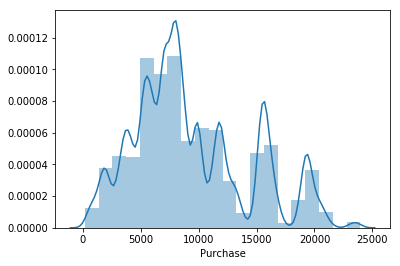

In [7]:
sns.distplot(data['Purchase'],bins =20)
plt.show()

In [8]:
print('% of data that is in beween Purchase range of 5000 to 12500: '
      ,int(100*data[data['Purchase'].between(5000,12500)].shape[0]/data.shape[0]),'%')

% of data that is in beween Purchase range of 5000 to 12500:  59 %


### Lets see this gender

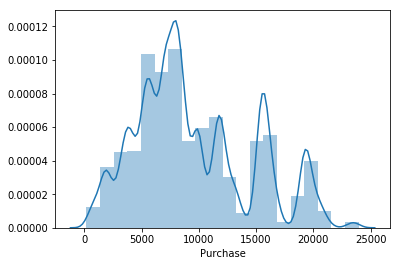

In [9]:
sns.distplot(data.loc[data['Gender'] == 'M','Purchase'],bins =20)
plt.show()

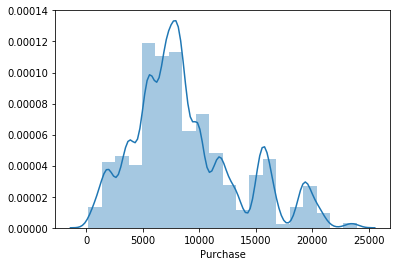

In [10]:
sns.distplot(data.loc[data['Gender'] == 'F','Purchase'],bins =20)
plt.show()


#### Observation:
1. Most of the purchases are in the range of **5,000 to 12,500** that is **60%**
2. If we aren't able to find a better feature to fill missing value
3. Or If the predecitons -ve then we can use this 5,000 to 12,500 average ie., **8,750 to replace em.**
4. Gender Wise comparision Mails's spending is high (above 15,000)

### 1. User_id

##### User ID and Product ID are ideally Unique but let us analyze that and see if we can get anything from them 
##### If the model finds it useful then it will use them other wise no. 

In [10]:
len(data['User_ID'].unique())

5889

In [11]:
user_id_freq = dict(data['User_ID'].value_counts())

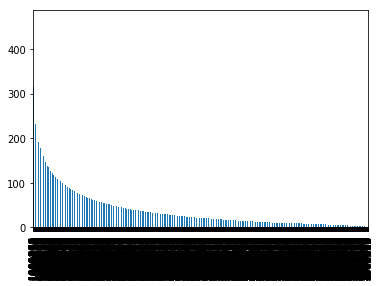

In [12]:
data['User_ID'].value_counts().plot(kind='bar')

#### Observation:
1. The frequency is steadily decreasing

#### Results:
1. insted of the categorical variable replace them with the frequency

In [13]:
data['User_ID_freq_cont'] = data['User_ID'].replace(user_id_freq)
print('Max Freq: ',max(data['User_ID_freq_cont']))

Max Freq:  464


### 2. Product_ID

In [14]:
pro_id_freq = dict(data['Product_ID'].value_counts())
len(data['Product_ID'].unique())

3483

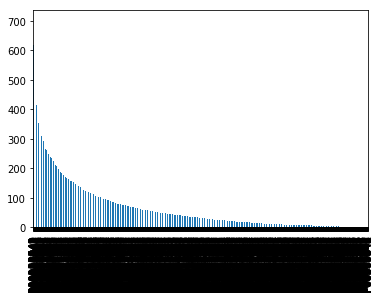

In [17]:
# data['Product_ID'].value_counts()
data['Product_ID'].value_counts().plot(kind='bar')

#### Observation:
1. The frequency is steadily decreasing

#### Results:
1. insted of the categorical variable replace them with the frequency

In [15]:
data['Product_ID_cont'] = data['Product_ID'].replace(pro_id_freq)
print('Max Freq: ',max(data['Product_ID_cont']))

Max Freq:  703


### 3.Gender

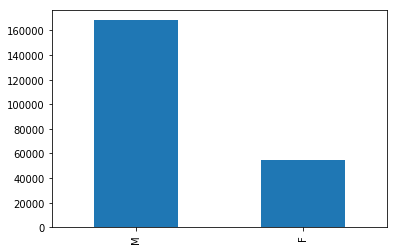

In [19]:
data['Gender'].value_counts().plot( kind='bar' )

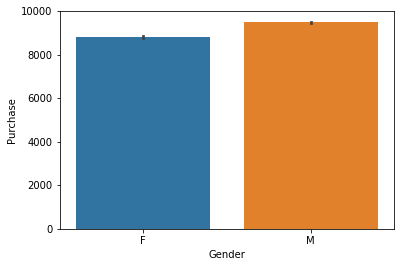

In [20]:
sns.barplot(x='Gender', y='Purchase', data=data )

#### Observation
1. In the above plot the Y axis is the mean of Purchase.
2. Men are spending slightly more than women 
3. But the difference is not that much

### 4. Age

In [16]:
data.Age.value_counts().sort_index()

0-17      6013
18-25    40904
26-35    88892
36-45    44462
46-50    18210
51-55    15741
55+       8820
Name: Age, dtype: int64

In [17]:
order = ['0-17','18-25','26-35','36-45','46-50','51-55']

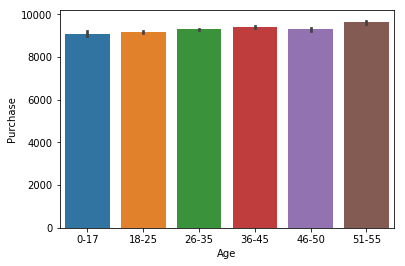

In [19]:
sns.barplot(x='Age',y='Purchase',data=data,order = order)

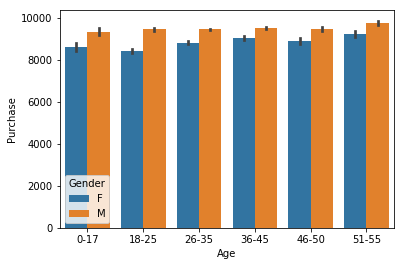

In [20]:
sns.barplot(x='Age',y='Purchase',data=data,order = order,hue = Data['Gender'])

#### Observation:
1. Even at age leves Femail spend less than mail 

#### Action:
1. Convert the age (cat) to numbers
2. Make a new feature Age_Gender

In [21]:
age_dict = {'0-17':8.5, '55+':60, '26-35':30.5, '46-50':48, '51-55':53, '36-45':40.5, '18-25':21.5}
data['Age_num'] = data['Age'].replace(age_dict)
data['Age_Gender'] = data['Age']+'_'+data['Gender']

In [22]:
data['Age_Gender'].value_counts()

26-35_M    68618
36-45_M    33605
18-25_M    30852
26-35_F    20274
46-50_M    12930
51-55_M    11707
36-45_F    10857
18-25_F    10052
55+_M       6723
46-50_F     5280
51-55_F     4034
0-17_M      3973
55+_F       2097
0-17_F      2040
Name: Age_Gender, dtype: int64

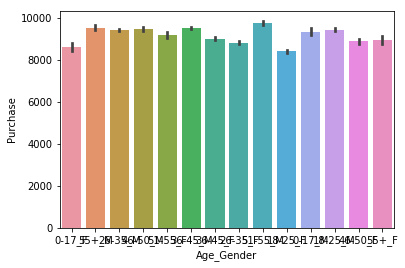

In [23]:
sns.barplot(x='Age_Gender',y='Purchase',data=data) 

### 5.Occupation

In [24]:
occ_mena = data.groupby('Occupation').Purchase.agg(['count','mean']).sort_values('mean').reset_index()
occ_mena

,Occupation,count,mean
0,9,2534,8711.421808
1,19,3450,8715.089565
2,20,13745,8837.501273
3,2,10638,8987.057906
4,1,18888,9007.127647
5,10,5150,9141.542524
6,0,28423,9172.019738
7,18,2679,9238.157148
8,3,7228,9247.679718
9,4,29401,9260.158124


1. Earlier assumption: Some occupation may more income than others so pruchase might be high for some occupation.
2. Or at occupation level person need to purchase (buying in bulk & selling it)


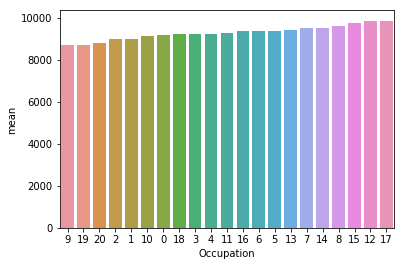

In [25]:
%matplotlib inline
sns.barplot(x='Occupation',y='mean',data=occ_mena,order = occ_mena['Occupation'])

#### Observation :
1. We can asume that people with some occupation will get higer pay checks 
2. Implies there spending will be more.
3. We can make these occupation into some clusters.

In [26]:
# 7->15, 12, 17
# 6->8, 14, 7
# 5->13, 5, 6, 16
# 4->11, 4, 3, 18
# 3->0, 10,
# 2->1, 2,
# 1->20, 19, 9

In [27]:
occup_dict = {15:'A',12:'A',17:'A',8:'B',14:'B',7:'B',
13:'C',5:'C',6:'C',7:'C',
11:'D',4:'D',3:'D',18:'D',
0:'E',10:'E',1:'F',2:'F',20:'G',19:'G',9:'G'}
data['Occupation_num'] = data['Occupation'].replace(occup_dict)

In [28]:
data['Occupation_num'] = data['Occupation_num'].replace({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

In [29]:
data['Occupation_num'].value_counts()

4     44112
5     40398
7     33655
3     33573
2     29526
1     19729
6     11781
16    10268
Name: Occupation_num, dtype: int64

### 6. City_Category

In [30]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

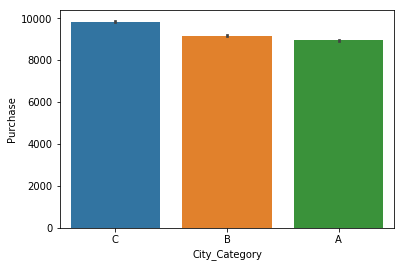

In [31]:
sns.barplot(x='City_Category',y='Purchase',data=data,order = ['C','B','A'])

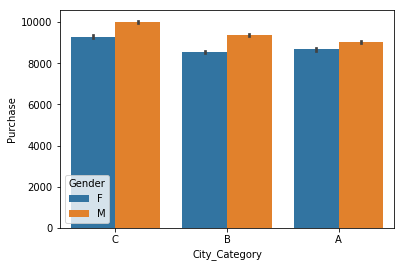

In [32]:
sns.barplot(x='City_Category',y='Purchase',data=data,hue = Data['Gender'],order = ['C','B','A'])
plt.show()

#### Observation
1. Clear difference between C, B and A.
2. Assumption can be C being Urban, B and  A can be rural
3. Females purchase in B and A is less 
4. For mails it is studily decresing.
5. Can make combi of both

In [33]:
data['City_Gender'] = data['City_Category']+'_'+data['Gender']

In [34]:
data['City_Gender'].value_counts()

B_M    70828
C_M    51860
A_M    45720
B_F    23412
C_F    16873
A_F    14349
Name: City_Gender, dtype: int64

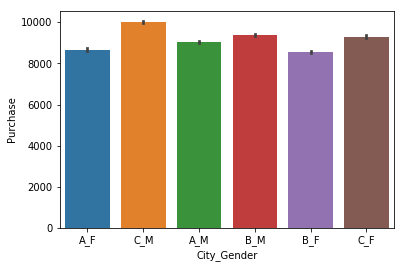

In [35]:
sns.barplot(x='City_Gender',y='Purchase',data=data)

### 7. Stay_In_Current_City_Years

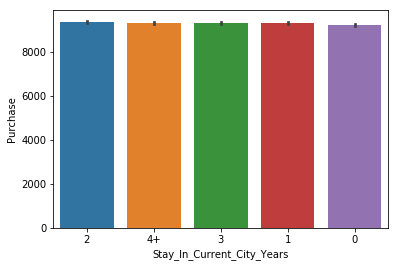

In [36]:
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data=data)

#### Obervation:
1. No much difference.

#### Action 
1. Can convert cat. to numeric

In [37]:
stay_year_dict = {'1':1,'2':2,'3':3,'4+':5} 
data['Stay_In_Current_City_Years_num'] = data['Stay_In_Current_City_Years'].replace(stay_year_dict)

### 8. Marital_Status

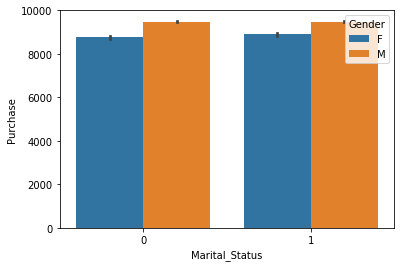

In [39]:
sns.barplot(x='Marital_Status',y='Purchase',data=data,hue = Data['Gender'])

### 9. Product_Category_1

In [40]:
pro_cat1_mena = data.groupby('Product_Category_1').Purchase.agg(['count','mean']).sort_values('mean').reset_index()
pro_cat1_mena

,Product_Category_1,count,mean
0,13,2217,724.356788
1,12,1585,1357.329338
2,4,4824,2323.922678
3,18,1260,2989.560317
4,11,9956,4667.189534
5,5,61799,6229.539200
6,8,46564,7495.251997
7,17,245,10093.089796
8,3,8285,10143.487628
9,2,9786,11219.560685


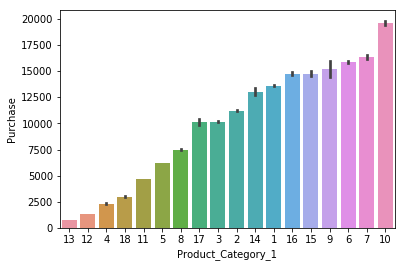

In [41]:
sns.barplot( x = 'Product_Category_1', y='Purchase', data=data,order =pro_cat1_mena['Product_Category_1'] )

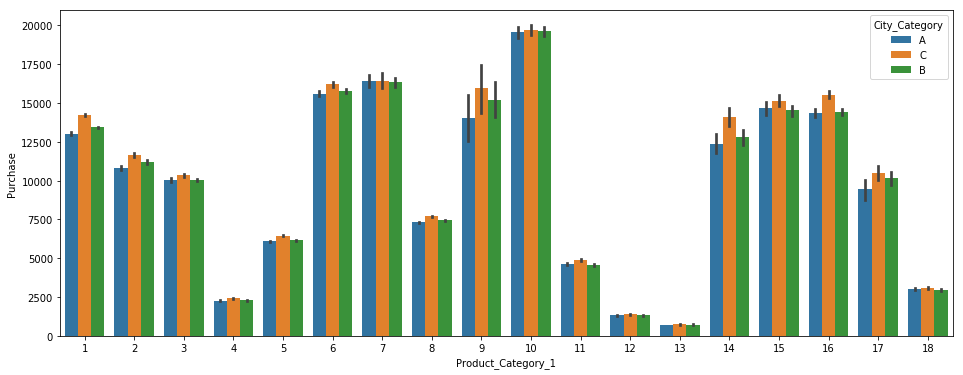

In [43]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Product_Category_1',y='Purchase',data=data,hue = Data['City_Category'])

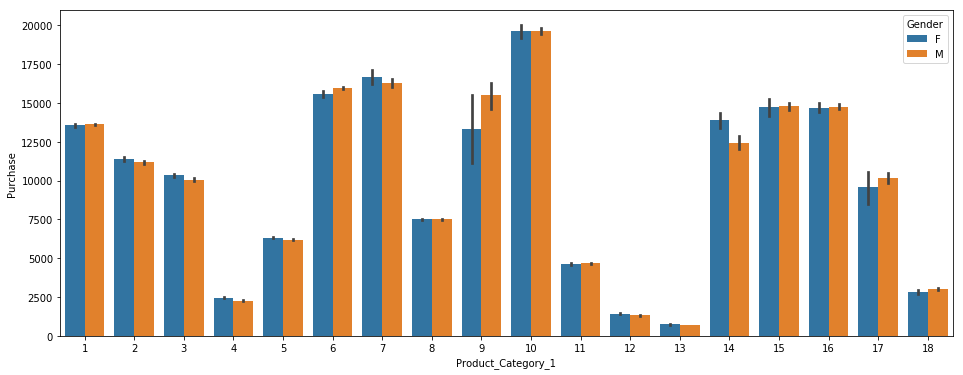

In [42]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Product_Category_1',y='Purchase',data=data,hue = Data['Gender'])

### Product_Category_2

In [44]:
print("% Data Missing in Product_Category_2: ", round(data['Product_Category_2'].isnull().sum()*100/data.shape[0],2))

% Data Missing in Product_Category_2:  31.02


In [45]:
pro_cat2_mena = data.groupby('Product_Category_2').Purchase.agg(['count','mean']).sort_values('mean').reset_index()
pro_cat2_mena

,Product_Category_2,count,mean
0,7.0,258,6722.693798
1,12.0,2288,6922.774913
2,14.0,22542,7126.804898
3,9.0,2362,7255.538527
4,5.0,10735,8996.276572
5,11.0,5778,9015.838699
6,18.0,1122,9413.659537
7,17.0,5443,9429.418703
8,13.0,4295,9679.438650
9,4.0,10550,10230.851361


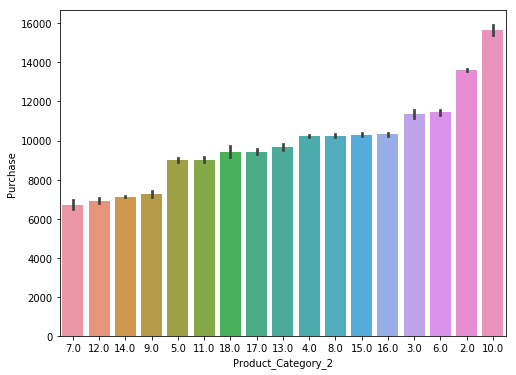

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Product_Category_2',y='Purchase',data=data,order =pro_cat2_mena['Product_Category_2'] )

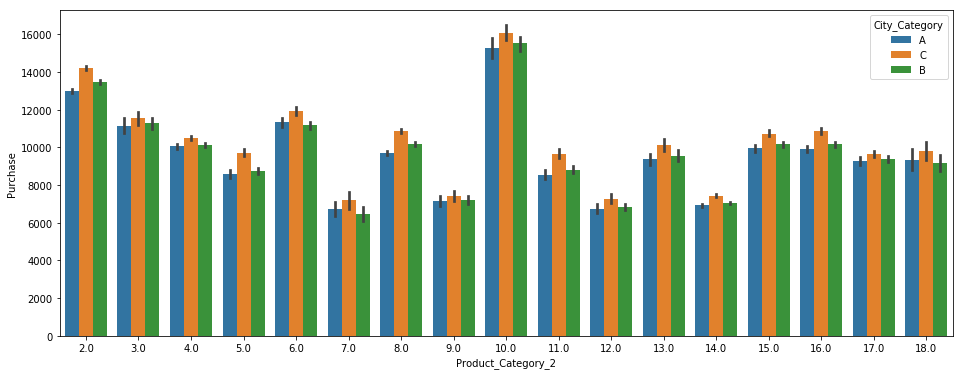

In [47]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Product_Category_2',y='Purchase',data=data,hue = Data['City_Category'])

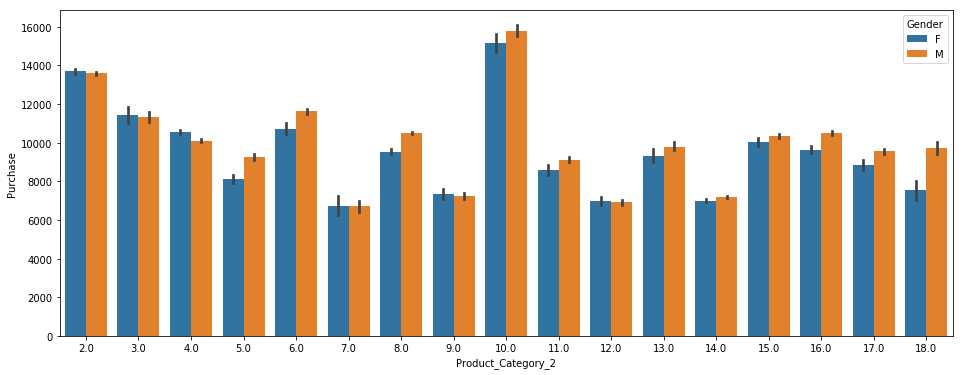

In [48]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Product_Category_2',y='Purchase',data=data,hue = Data['Gender'])

### 3. Product_Category_3

In [49]:
print("% Data Missing in Product_Category_3: ", round(data['Product_Category_3'].isnull().sum()*100/data.shape[0],2))

% Data Missing in Product_Category_3:  69.37


In [50]:
pro_cat3_mena = data.groupby('Product_Category_3').Purchase.agg(['count','mean']).sort_values('mean').reset_index()
pro_cat3_mena

,Product_Category_3,count,mean
0,12.0,3827,8740.551868
1,4.0,769,9783.119636
2,14.0,7537,10014.186016
3,9.0,4827,10406.915061
4,18.0,1865,10769.901340
5,17.0,6868,11795.253931
6,16.0,13324,11949.133068
7,11.0,773,12094.240621
8,5.0,6861,12204.615196
9,15.0,11400,12285.162719


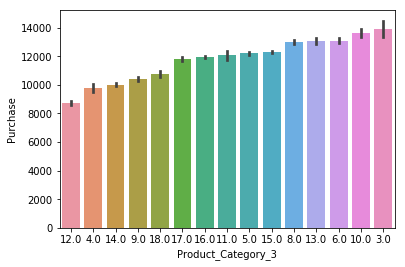

In [51]:
sns.barplot(x='Product_Category_3',y='Purchase',data=data,order =pro_cat3_mena['Product_Category_3'])

#### Observation:
##### Product_Category_1
1. Product_Category_1 has large variance this can give good results.
2. Gender wise difference is very less except on 9th, 14th. and as you can see from pro_cat1_mean those counts are very less.
3. Since City Cat. has larger variance amoung all we have combined this with city cat. 
4. Looks like **City cat.+ Prodcat1** has larger variance than Gender + ProdCat1
5. As previous we can add new featues by clustring the Prod Cat 1.

##### Product_Category_2
1. Even in prod cat 2 10's purchase is more.
2. Compared to Prod cat 1+ gender prod cat 2 + gender has higer varience.
    1. Some 5 prod cat2 + gender combi has more female purchases than male which is the opposit of acutal female to mail
    2. And so on...
3. Fill missing values with 0 cause this feature has missing values.

##### Product_Category_3
1. 70% of the data has null
2. Create Clusters.
3. Nothing much to do.


#### Action:
1. Make a new feature of Prodcat1 + City cat.
2. Clusters of Prodcat1
3. New fature Procat2+city
4. Clusters of Prodcat2
5. new feature procat2+Gender.
6. Sum of Clusters of prod Cat.
7. Product cat 10 seems to have higher purchase so we can make a flag for that 


**One Big thing to note is the prucase is the sum of product cat of 1,2 and 3**

**But We are doing univariate nalysis and creating features**

**So, My assumption is molde will pick if it finds the feature useful.**



see how many products are there.

In [52]:
data['Prod_cat1_City'] = data['Product_Category_1'].astype(str)+'_'+data['City_Category']
prod_cat1_dict = {8:'A',5:'A',11:'A',18:'A',4:'A',12:'A',13:'A', 
                  17:'B',3:'B',2:'B',1:'C',14:'C',16:'D',15:'D',9:'D',6:'F',7:'F',10:'G'}
data['Product_Category_1_num'] = data['Product_Category_1'].replace(prod_cat1_dict)
data['Product_Category_1_num'].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7},inplace=True)


data['Prod_cat2_City'] = data['Product_Category_2'].astype(str)+'_'+data['City_Category']
data['Prod_cat2_Gender'] = data['Product_Category_2'].astype(str)+'_'+data['Gender']
prod_cat2_dict = {7:'A',12:'A',14:'A',9:'A',5:'B',11:'B',18:'B',17:'B',13:'B',
                  4:'C',8:'C',15:'C',16:'C',6:'D',2:'C',10:'D'}
data['Product_Category_2_num'] = data['Product_Category_2'].replace(prod_cat2_dict)
data['Product_Category_2_num'].replace({'A':1,'B':2,'C':3,'D':4},inplace=True)
data['Product_Category_2_num'].fillna(0,inplace = True)


prod_cat3_dict = {12:'A',4:'A',14:'A',9:'A',18:'A',
17:'B',16:'B',11:'B',5:'B',15:'B',
8:'D',13:'D',6:'D',10:'D',3:'D'}
data['Product_Category_3_num'] = data['Product_Category_3'].replace(prod_cat3_dict)
data['Product_Category_3_num'].replace({'A':1,'B':2,'C':3,'D':4},inplace=True)
data['Product_Category_3_num'].fillna(0,inplace = True)

data['Product_Category_sum'] = data['Product_Category_3_num']+data['Product_Category_2_num']+data['Product_Category_1_num']

In [82]:
pro_catSum_mena = data.groupby('Product_Category_sum').Purchase.agg(['count','mean']).sort_values('mean').reset_index()
pro_catSum_mena

,Product_Category_sum,count,mean
0,1.0,58209,6413.233641
1,2.0,20443,6554.653329
2,3.0,15703,7586.522512
3,4.0,35664,7630.187977
4,5.0,13232,8559.716218
5,7.0,14273,11889.763180
6,6.0,26319,12607.172385
7,8.0,20244,13898.610156
8,9.0,9209,14332.515800
9,13.0,556,14995.007194


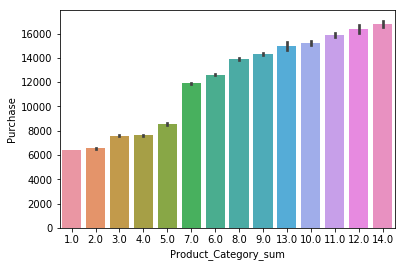

In [83]:
sns.barplot(x='Product_Category_sum',y='Purchase',data=data,order =pro_catSum_mena['Product_Category_sum'])

In [73]:
data['Product_Category_10_flag'] = ((data['Product_Category_1'] == 10)|
                                    (data['Product_Category_2'] == 10)|
                                    (data['Product_Category_1'] == 10))

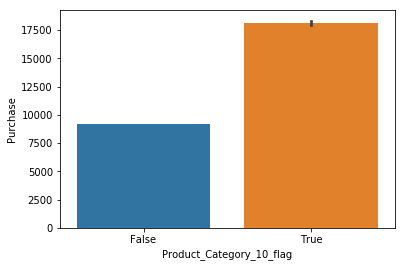

In [74]:
sns.barplot(x='Product_Category_10_flag',y='Purchase',data=data)

In [84]:
data.isnull().sum()

User_ID                                0
Product_ID                             0
Gender                                 0
Age                                    0
Occupation                             0
City_Category                          0
Stay_In_Current_City_Years             0
Marital_Status                         0
Product_Category_1                     0
Product_Category_2                 69192
Product_Category_3                154732
Purchase                               0
User_ID_freq_cont                      0
Product_ID_cont                        0
Age_num                                0
Age_Gender                             0
Occupation_num                         0
City_Gender                            0
Stay_In_Current_City_Years_num         0
Prod_cat1_City                         0
Product_Category_1_num                 0
Prod_cat2_City                         0
Prod_cat2_Gender                       0
Product_Category_2_num                 0
Product_Category